# Band Geometry

In [1]:
from datetime import datetime

import pandas as pd

from lets_plot import *


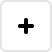
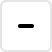
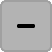
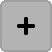
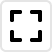
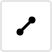
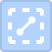
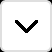
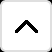
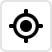
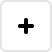
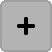
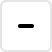
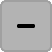
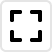
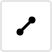
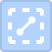
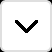
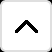
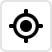

In [2]:
LetsPlot.setup_html()

In [3]:
def get_dt(year, month=1, day=1):
    return int(round(1_000 * datetime(year, month, day).timestamp()))

In [4]:
presidential_df = pd.read_csv("data/presidential.csv", parse_dates=["start", "end"])
economics_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/economics.csv", parse_dates=["date"])

In [5]:
breaks = [2.5, 5, 10]

ggplot() + \
    geom_band(aes(xmin="start", xmax="end", fill="party"), data=presidential_df, \
              size=0, alpha=.4) + \
    geom_label(aes("start", label="name", color="party"), 
               data=presidential_df, 
               y=4000, alpha=0.6, 
               angle=90,
               vjust=1, show_legend=False) + \
    geom_line(aes("date", "unemploy"), data=economics_df) + \
    scale_y_continuous("Unemployment (x\(10^3\))", trans='log10', \
                       breaks=[b*10**3 for b in breaks], labels=[str(b) for b in breaks]) + \
    scale_fill_discrete(name="") + \
    coord_cartesian(xlim=[get_dt(1966), get_dt(2016)]) + \
    xlab("Year") + \
    guides(fill=guide_legend(override_aes={'alpha': 0.4, 'color': 'paper'})) + \
    ggsize(1000, 400) + \
    theme(legend_position='top')